Aquí se pone texto 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv('chirp_dataset.csv')


   bias  chirps
0   1.0   1.000
1   1.0   0.800
2   1.0   0.990
3   1.0   0.920
4   1.0   0.855
[36.770999999, 34.02199999799999, 31.68933333066667, 29.356666663333332, 27.523999995999997, 25.691333328666666, 23.858666661333327, 22.025999994000003, 20.609666660333335, 19.193333326666664, 18.276999992999997, 17.360666659333333, 16.444333325666666, 15.527999991999998, 14.611666658333336, 13.695333324666668, 12.778999991000001, 11.862666657333332, 10.946333323666666, 10.446333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666, 9.946333323666666

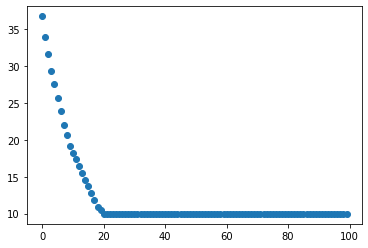

In [ ]:
df = pd.read_csv('chirp_dataset.csv')
#print(df.head())

df = pd.concat([pd.Series(1,index=df.index,name='bias'),df],axis=1)
#print(df.head())

X = df.drop(columns=['temperature'])
y = df.iloc[:,2]
#los dos puntos es "todos en la columna 2" iloc es acceder al indice y agarrarlos
#print(X.head())
#queremos predecir el chirp, entonces la agarramos
#print(y.head())

for column in X:
    X[column] = X[column]/np.max(X[column])


print(X.head())
#inicializar theta para método grad desc
theta = np.array([0]*len(X.columns))
#print(theta)

m=len(df)
#print(m)

def hipotesis(theta,X):
    return theta*X


def funcion_de_costo(X,y,theta):
    y1=hipotesis(theta,X)
    y1=np.sum(y1,axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*m)
    
def gradiente_descendiente(X,y,theta,eta,i):
    J=[] #función de costo en cada iteración
    k=0 #variable que controla la iteración actual
    while k<i:
        y1 = hipotesis(theta,X)
        y1 = np.sum(y1,axis=1)
        for c in range(0,len(X.columns)):
            theta[c] = theta[c]-eta*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = funcion_de_costo(X, y, theta) #variable que alberga el valor k de la función de costo
        J.append(j)
        k += 1
    return J,j,theta

J,j,theta = gradiente_descendiente(X, y, theta, 0.05, 100)    


print(J)
print(j)
print(theta)

y_hat = hipotesis(theta,X)
y_hat = np.sum(y_hat,axis=1)

#Finalmente, graficamos

#plt.figure()
plt.scatter(x=list(range(0,100)),y=J)
plt.show()

   bias  chirps
0   1.0   1.000
1   1.0   0.800
2   1.0   0.990
3   1.0   0.920
4   1.0   0.855
[36.770999999, 34.02199999799999, 31.68933333066667, 29.356666663333332, 27.523999995999997, 25.691333328666666, 23.858666661333327, 22.025999994000003, 20.609666660333335, 19.193333326666664, 18.276999992999997, 17.360666659333333, 16.444333325666666, 15.527999991999998, 14.611666658333336, 13.695333324666668, 12.778999991000001, 11.862666657333332, 10.946333323666666, 10.446333323666666, 9.946333323666666, 9.946333323666666]
9.946333323666666
0.0
[36 29]


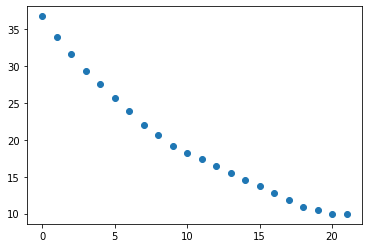

In [ ]:
#Reiniciar el entorno de ejecución si se corrio el chunk anterior
df = pd.concat([pd.Series(1,index=df.index,name='bias'),df],axis=1)
#print(df.head())

X = df.drop(columns=['temperature'])
y = df.iloc[:,2]
#los dos puntos es "todos en la columna 2" iloc es acceder al indice y agarrarlos
#print(X.head())
#queremos predecir el chirrido, entonces la agarramos
#print(y.head())

for column in X:
    X[column] = X[column]/np.max(X[column])


print(X.head())
#inicializar theta para método grad desc
theta = np.array([0]*len(X.columns))
#print(theta)

m=len(df)
#print(m)

def hipotesis(theta,X):
    return theta*X

def funcion_de_costo(X,y,theta):
    y1=hipotesis(theta,X)
    y1=np.sum(y1,axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*m)
    
#Implementaremos el early stop


def gradiente_descendiente(X, y, theta, eta):
  y1 = hipotesis(theta, X)
  y1 = np.sum(y1, axis=1)
  for c in range(0, len(X.columns)):
    theta[c] = theta[c] - eta*(sum((y1-y)*X.iloc[:,c])/len(X))
  j = funcion_de_costo(X, y, theta) #variable que alberga la func de costo
  return j, theta

tol = 0.00001
j_ant = 0
J = [] #guarda la funcion de costo en cada iteracion
j_nuevo, theta = gradiente_descendiente(X,y, theta, 0.05)
J.append(j_nuevo)
resta = np.abs(j_ant-j_nuevo)
while (resta >= tol):
  j_ant = j_nuevo
  j_nuevo, theta = gradiente_descendiente(X, y, theta, 0.05)
  J.append(j_nuevo)
  resta = np.abs(j_nuevo-j_ant)

print(J)
print(j_nuevo)
print(resta)
print(theta)

plt.figure()
plt.scatter(x=list(range(0, len(J))), y = J)
plt.show()
